<a href="https://colab.research.google.com/github/jarda51/ZSkladLogin2/blob/master/final_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#mount_my_drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold">
Case Study: Freshwater per capita, a time bomb??? </p>
<br> 

## Case Study: Freshwater per capita, a time bomb???
<br> 
## There are two datasets

### 1. Renewable internal freshwater resources per capita (cubic meters ) 
<br>
* **Location: https://data.worldbank.org/indicator/ER.H2O.INTR.PC**. 
<br>

### 2. Population total 
<br>
* **Location: https://data.worldbank.org/indicator/SP.POP.TOTL**. 
<br>

Let us look at the files in this dataset using the UNIX command ls.

In [2]:
# Renewable internal freshwater resources per capita = > rifr per capita

In [3]:
!head -10  './drive/MyDrive/ColabNotebooks/final_project/Renewable internal freshwater resources per capita/API_ER.H2O.INTR.PC_DS2_en_csv_v2_2456313.csv'

﻿"Data Source","World Development Indicators",

"Last Updated Date","2021-05-25",

"Country Name","Country Code","Indicator Name","Indicator Code","1960","1961","1962","1963","1964","1965","1966","1967","1968","1969","1970","1971","1972","1973","1974","1975","1976","1977","1978","1979","1980","1981","1982","1983","1984","1985","1986","1987","1988","1989","1990","1991","1992","1993","1994","1995","1996","1997","1998","1999","2000","2001","2002","2003","2004","2005","2006","2007","2008","2009","2010","2011","2012","2013","2014","2015","2016","2017","2018","2019","2020",
"Aruba","ABW","Renewable internal freshwater resources per capita (cubic meters)","ER.H2O.INTR.PC","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","",
"Afghanistan","AFG","Renewable internal freshwater resources per capita (cubic meters)","ER.H2O.INTR.PC","","","5042.00368691841","","","","",

We have to get rid of first four rows

In [4]:
!sed -e '1,4d' < './drive/MyDrive/ColabNotebooks/final_project/Renewable internal freshwater resources per capita/API_ER.H2O.INTR.PC_DS2_en_csv_v2_2456313.csv' > './drive/MyDrive/ColabNotebooks/final_project/rifr.csv'

In [5]:
import pandas as pd
rifr = pd.read_csv('./drive/MyDrive/ColabNotebooks/final_project/rifr_cut.csv')

In [6]:
rifr.shape

(264, 66)

What columns are there?

In [7]:
rifr.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', 'Unnamed: 65'],
      dtype='object')

Get rid of unecessary columns 'Country Name', 'Indicator Name', 'Indicator Code','Unnamed: 65'  and check it

In [8]:
rifr = rifr.drop(['Country Name', 'Indicator Name', 'Indicator Code','Unnamed: 65'], axis=1)
rifr.columns

Index(['Country Code', '1960', '1961', '1962', '1963', '1964', '1965', '1966',
       '1967', '1968', '1969', '1970', '1971', '1972', '1973', '1974', '1975',
       '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984',
       '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993',
       '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002',
       '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011',
       '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020'],
      dtype='object')

Let´s see the head:

In [9]:
rifr.head()

,Country Code,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,ABW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AFG,NaN,NaN,5042.003687,NaN,NaN,NaN,NaN,4533.686105,NaN,NaN,NaN,NaN,3998.739740,NaN,NaN,NaN,NaN,3579.751317,NaN,NaN,NaN,NaN,3659.995926,NaN,NaN,NaN,NaN,4063.067074,NaN,NaN,NaN,NaN,3254.968781,NaN,NaN,NaN,NaN,2435.795479,NaN,NaN,NaN,NaN,2086.212107,NaN,NaN,NaN,NaN,1739.817987,NaN,NaN,NaN,NaN,1513.091078,NaN,NaN,NaN,NaN,1299.026901,NaN,NaN,NaN
2,AGO,NaN,NaN,26388.333932,NaN,NaN,NaN,NaN,25631.065405,NaN,NaN,NaN,NaN,23685.487454,NaN,NaN,NaN,NaN,19644.970257,NaN,NaN,NaN,NaN,16530.864129,NaN,NaN,NaN,NaN,13845.686086,NaN,NaN,NaN,NaN,11692.796116,NaN,NaN,NaN,NaN,9951.874617,NaN,NaN,NaN,NaN,8447.769695,NaN,NaN,NaN,NaN,7079.523087,NaN,NaN,NaN,NaN,5894.551805,NaN,NaN,NaN,NaN,4963.653313,NaN,NaN,NaN
3,ALB,NaN,NaN,15718.869480,NaN,NaN,NaN,NaN,13685.402610,NaN,NaN,NaN,NaN,11992.193038,NaN,NaN,NaN,NaN,10702.012217,NaN,NaN,NaN,NaN,9661.391571,NaN,NaN,NaN,NaN,8723.555708,NaN,NaN,NaN,NaN,8284.470867,NaN,NaN,NaN,NaN,8544.345311,NaN,NaN,NaN,NaN,8816.752485,NaN,NaN,NaN,NaN,9057.187215,NaN,NaN,NaN,NaN,9274.579618,NaN,NaN,NaN,NaN,9361.546040,NaN,NaN,NaN
4,AND,NaN,NaN,20533.506831,NaN,NaN,NaN,NaN,15203.776857,NaN,NaN,NaN,NaN,11735.832218,NaN,NaN,NaN,NaN,9630.465961,NaN,NaN,NaN,NaN,8068.722197,NaN,NaN,NaN,NaN,6513.259726,NaN,NaN,NaN,NaN,5359.326179,NaN,NaN,NaN,NaN,4906.182474,NaN,NaN,NaN,NaN,4505.417636,NaN,NaN,NaN,NaN,3816.941609,NaN,NaN,NaN,NaN,3828.842491,NaN,NaN,NaN,NaN,4098.648070,NaN,NaN,NaN


There are a lot of NaN in various columns. Let´s get rid of columns with all NaN

In [10]:
rifr.dropna(axis=1, how='all', inplace=True)

In [11]:
rifr.shape

(264, 14)

We have now 14 columns instead of 66. 52 Columns were with NaN. Now we can inspect the general overview:

In [12]:
rifr.describe()

,1962,1967,1972,1977,1982,1987,1992,1997,2002,2007,2012,2014,2017
count,197.000000,197.000000,198.000000,198.000000,198.000000,198.000000,220.000000,225.000000,2.270000e+02,2.280000e+02,228.000000,1.000000,227.000000
mean,39691.071342,35360.823620,32218.536111,29325.995708,26666.949630,24325.115022,20848.417820,18785.620435,6.439801e+04,6.292416e+04,15005.687546,194.565675,14101.975250
std,93957.420653,84644.955100,78072.869462,72480.774352,67685.172606,63726.352537,56987.824382,53428.246812,7.076280e+05,7.066086e+05,45271.266142,NaN,42686.354450
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.646926,0.000000,0.000000e+00,0.000000e+00,0.000000,194.565675,0.000000
25%,2897.578359,2564.946388,2399.116774,2216.459213,2010.339925,1856.413693,1688.306525,1511.543363,1.376974e+03,1.264143e+03,1159.751875,194.565675,1067.558002
50%,7885.871166,7031.870782,6488.940105,6217.288588,5664.972221,4975.607995,4883.692755,4196.445835,4.330724e+03,3.862790e+03,3526.840514,194.565675,3361.771700
75%,28585.435702,25631.065405,24235.611937,22503.339680,21571.593906,19912.703422,13837.505336,13336.341722,1.291910e+04,1.166662e+04,10099.787446,194.565675,9920.276716
max,932129.971817,855341.608344,812864.294697,766459.722542,726930.642265,691453.231324,651198.780343,627010.120681,1.065202e+07,1.066219e+07,530063.981841,194.565675,495049.504950


As we can see, there is only one row in 2014. So the right think to do is to remove it.

In [13]:
rifr = rifr.drop(['2014'], axis=1)

In [14]:
rifr.describe()

,1962,1967,1972,1977,1982,1987,1992,1997,2002,2007,2012,2017
count,197.000000,197.000000,198.000000,198.000000,198.000000,198.000000,220.000000,225.000000,2.270000e+02,2.280000e+02,228.000000,227.000000
mean,39691.071342,35360.823620,32218.536111,29325.995708,26666.949630,24325.115022,20848.417820,18785.620435,6.439801e+04,6.292416e+04,15005.687546,14101.975250
std,93957.420653,84644.955100,78072.869462,72480.774352,67685.172606,63726.352537,56987.824382,53428.246812,7.076280e+05,7.066086e+05,45271.266142,42686.354450
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.646926,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,2897.578359,2564.946388,2399.116774,2216.459213,2010.339925,1856.413693,1688.306525,1511.543363,1.376974e+03,1.264143e+03,1159.751875,1067.558002
50%,7885.871166,7031.870782,6488.940105,6217.288588,5664.972221,4975.607995,4883.692755,4196.445835,4.330724e+03,3.862790e+03,3526.840514,3361.771700
75%,28585.435702,25631.065405,24235.611937,22503.339680,21571.593906,19912.703422,13837.505336,13336.341722,1.291910e+04,1.166662e+04,10099.787446,9920.276716
max,932129.971817,855341.608344,812864.294697,766459.722542,726930.642265,691453.231324,651198.780343,627010.120681,1.065202e+07,1.066219e+07,530063.981841,495049.504950


At first glance, the two years 2002 and 2007 have higher values than the other years.

In [15]:
mean_rifr = rifr.mean(axis=0,skipna=True)

In [17]:
mean_rifr

1962    39691.071342
1967    35360.823620
1972    32218.536111
1977    29325.995708
1982    26666.949630
1987    24325.115022
1992    20848.417820
1997    18785.620435
2002    64398.013987
2007    62924.161007
2012    15005.687546
2017    14101.975250
dtype: float64

Let´s have a look at data visualizing them

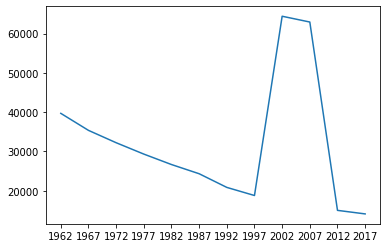

In [18]:
import matplotlib.pyplot as plt
plt.plot( mean_rifr )
plt.show()

There is something strange in 2002 and 2007. 

In [19]:
rifr_sorted = rifr.sort_values(['2002', '2007'], ascending=(False, False))
rifr_sorted.head()

,Country Code,1962,1967,1972,1977,1982,1987,1992,1997,2002,2007,2012,2017
89,GRL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.065202e+07,1.066219e+07,NaN,NaN
112,ISL,932129.971817,855341.608344,812864.294697,766459.722542,726930.642265,691453.231324,651198.780343,627010.120681,5.912570e+05,5.456308e+05,530063.981841,495049.504950
92,GUY,397502.824579,356576.920744,333819.056220,316097.079840,308481.579426,318173.656805,321933.417223,317954.536459,3.235816e+05,3.228512e+05,319036.694515,310879.091253
218,SUR,325771.486110,284750.325737,269089.742788,276807.708116,274293.693739,259820.015589,235345.577643,217982.451312,2.052971e+05,1.936692e+05,182910.944541,173531.685308
30,BTN,405024.003001,351920.932628,299847.235724,255769.624261,221479.295183,192186.311479,177730.881770,146816.528278,1.314897e+05,1.173151e+05,111177.152240,104618.223958


As we can see, there is definitely an outlier in the row 89 for the two years 2002 and 2007. Let´s get rid of him.

In [20]:
# Delete row with index label '89' 
rifr_modi = rifr.drop(index=89 )

In [21]:
rifr_modi.describe()

,1962,1967,1972,1977,1982,1987,1992,1997,2002,2007,2012,2017
count,197.000000,197.000000,198.000000,198.000000,198.000000,198.000000,220.000000,225.000000,226.000000,227.000000,228.000000,227.000000
mean,39691.071342,35360.823620,32218.536111,29325.995708,26666.949630,24325.115022,20848.417820,18785.620435,17550.144740,16231.372063,15005.687546,14101.975250
std,93957.420653,84644.955100,78072.869462,72480.774352,67685.172606,63726.352537,56987.824382,53428.246812,50463.192850,47074.835968,45271.266142,42686.354450
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.646926,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2897.578359,2564.946388,2399.116774,2216.459213,2010.339925,1856.413693,1688.306525,1511.543363,1376.522413,1264.142861,1159.751875,1067.558002
50%,7885.871166,7031.870782,6488.940105,6217.288588,5664.972221,4975.607995,4883.692755,4196.445835,4176.479445,3816.941609,3526.840514,3361.771700
75%,28585.435702,25631.065405,24235.611937,22503.339680,21571.593906,19912.703422,13837.505336,13336.341722,12681.427221,11472.755596,10099.787446,9920.276716
max,932129.971817,855341.608344,812864.294697,766459.722542,726930.642265,691453.231324,651198.780343,627010.120681,591257.047262,545630.781279,530063.981841,495049.504950


In [22]:
rifr_modi_mean = rifr_modi.mean(axis=0)

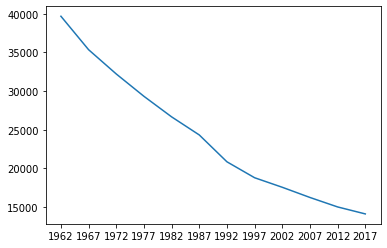

In [23]:
import matplotlib.pyplot as plt
plt.plot( rifr_modi_mean )
plt.show()

Let´s display it better

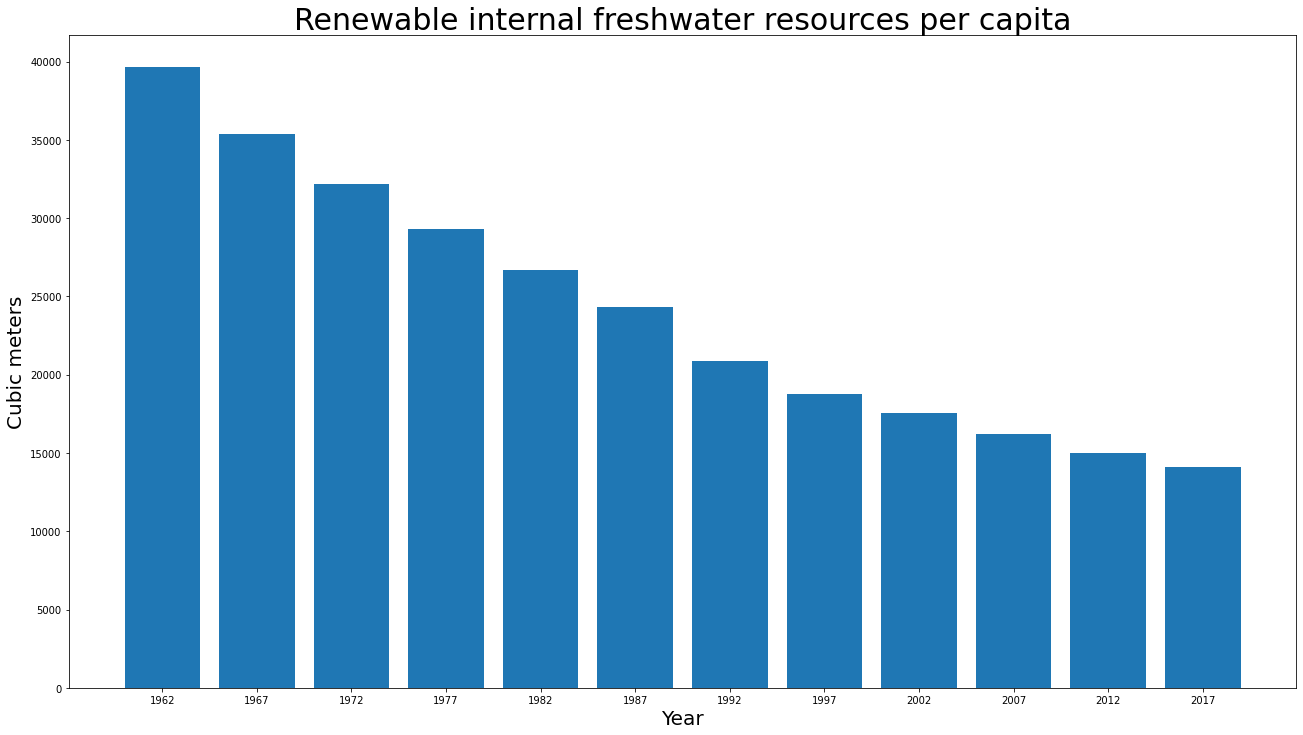

In [24]:
plt.figure(figsize=(22,12))
plt.xlabel('Year', fontsize=20)
plt.ylabel('Cubic meters', fontsize=20)
plt.title('Renewable internal freshwater resources per capita', fontsize=30)
plt.bar(rifr_modi_mean.index, rifr_modi_mean.values)
plt.show()

Now, our dataset Renewable internal freshwater resources per capita = > rifr per capita is clean. Because this dataset is built on per capita value, we sould take data of population also in account. I use the dataset "Population, total" from the World Bank Data. 

# **Examination of population data**

In [25]:
!head -10  './drive/MyDrive/ColabNotebooks/final_project/population/population.csv'

﻿"Data Source","World Development Indicators",

"Last Updated Date","2021-05-25",

"Country Name","Country Code","Indicator Name","Indicator Code","1960","1961","1962","1963","1964","1965","1966","1967","1968","1969","1970","1971","1972","1973","1974","1975","1976","1977","1978","1979","1980","1981","1982","1983","1984","1985","1986","1987","1988","1989","1990","1991","1992","1993","1994","1995","1996","1997","1998","1999","2000","2001","2002","2003","2004","2005","2006","2007","2008","2009","2010","2011","2012","2013","2014","2015","2016","2017","2018","2019","2020",
"Aruba","ABW","Population, total","SP.POP.TOTL","54211","55438","56225","56695","57032","57360","57715","58055","58386","58726","59063","59440","59840","60243","60528","60657","60586","60366","60103","59980","60096","60567","61345","62201","62836","63026","62644","61833","61079","61032","62149","64622","68235","72504","76700","80324","83200","85451","87277","89005","90853","92898","94992","97017","98737","100031","100834"

In [26]:
!sed -e '1,4d' < './drive/MyDrive/ColabNotebooks/final_project/population/population.csv' > './drive/MyDrive/ColabNotebooks/final_project/population.csv'

In [27]:
population = pd.read_csv('./drive/MyDrive/ColabNotebooks/final_project/population.csv')

In [28]:
population.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,Unnamed: 65
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54211.0,55438.0,56225.0,56695.0,57032.0,57360.0,57715.0,58055.0,58386.0,58726.0,59063.0,59440.0,59840.0,60243.0,60528.0,60657.0,60586.0,60366.0,60103.0,59980.0,60096.0,60567.0,61345.0,62201.0,62836.0,63026.0,62644.0,61833.0,61079.0,61032.0,62149.0,64622.0,68235.0,72504.0,76700.0,80324.0,83200.0,85451.0,87277.0,89005.0,90853.0,92898.0,94992.0,97017.0,98737.0,100031.0,100834.0,101222.0,101358.0,101455.0,101669.0,102046.0,102560.0,103159.0,103774.0,104341.0,104872.0,105366.0,105845.0,106314.0,NaN,NaN
1,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996973.0,9169410.0,9351441.0,9543205.0,9744781.0,9956320.0,10174836.0,10399926.0,10637063.0,10893776.0,11173642.0,11475445.0,11791215.0,12108963.0,12412950.0,12689160.0,12943093.0,13171306.0,13341198.0,13411056.0,13356511.0,13171673.0,12882528.0,12537730.0,12204292.0,11938208.0,11736179.0,11604534.0,11618005.0,11868877.0,12412308.0,13299017.0,14485546.0,15816603.0,17075727.0,18110657.0,18853437.0,19357126.0,19737765.0,20170844.0,20779953.0,21606988.0,22600770.0,23680871.0,24726684.0,25654277.0,26433049.0,27100536.0,27722276.0,28394813.0,29185507.0,30117413.0,31161376.0,32269589.0,33370794.0,34413603.0,35383128.0,36296400.0,37172386.0,38041754.0,NaN,NaN
2,Angola,AGO,"Population, total",SP.POP.TOTL,5454933.0,5531472.0,5608539.0,5679458.0,5735044.0,5770570.0,5781214.0,5774243.0,5771652.0,5803254.0,5890365.0,6040777.0,6248552.0,6496962.0,6761380.0,7024000.0,7279509.0,7533735.0,7790707.0,8058067.0,8341289.0,8640446.0,8952950.0,9278096.0,9614754.0,9961997.0,10320111.0,10689250.0,11068050.0,11454777.0,11848386.0,12248901.0,12657366.0,13075049.0,13503747.0,13945206.0,14400719.0,14871570.0,15359601.0,15866869.0,16395473.0,16945753.0,17519417.0,18121479.0,18758145.0,19433602.0,20149901.0,20905363.0,21695634.0,22514281.0,23356246.0,24220661.0,25107931.0,26015780.0,26941779.0,27884381.0,28842484.0,29816748.0,30809762.0,31825295.0,NaN,NaN
3,Albania,ALB,"Population, total",SP.POP.TOTL,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,1914573.0,1965598.0,2022272.0,2081695.0,2135479.0,2187853.0,2243126.0,2296752.0,2350124.0,2404831.0,2458526.0,2513546.0,2566266.0,2617832.0,2671997.0,2726056.0,2784278.0,2843960.0,2904429.0,2964762.0,3022635.0,3083605.0,3142336.0,3227943.0,3286542.0,3266790.0,3247039.0,3227287.0,3207536.0,3187784.0,3168033.0,3148281.0,3128530.0,3108778.0,3089027.0,3060173.0,3051010.0,3039616.0,3026939.0,3011487.0,2992547.0,2970017.0,2947314.0,2927519.0,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0,2873457.0,2866376.0,2854191.0,NaN,NaN
4,Andorra,AND,"Population, total",SP.POP.TOTL,13411.0,14375.0,15370.0,16412.0,17469.0,18549.0,19647.0,20758.0,21890.0,23058.0,24276.0,25559.0,26892.0,28232.0,29520.0,30705.0,31777.0,32771.0,33737.0,34818.0,36067.0,37500.0,39114.0,40867.0,42706.0,44600.0,46517.0,48455.0,50434.0,52448.0,54509.0,56671.0,58888.0,60971.0,62677.0,63850.0,64360.0,64327.0,64142.0,64370.0,65390.0,67341.0,70049.0,73182.0,76244.0,78867.0,80993.0,82684.0,83862.0,84463.0,84449.0,83747.0,82427.0,80774.0,79213.0,78011.0,77297.0,77001.0,77006.0,77142.0,NaN,NaN


In [29]:
# we need only thy sum. Delete unnecessary columns.
population = population.drop(['Country Name', 'Indicator Name', 'Indicator Code','Country Code', 'Unnamed: 65'], axis=1)

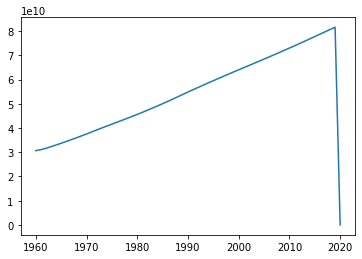

In [30]:
popul_sum = population.sum()
popul_sum.plot()

There is something missing at the end of the dataset. Let´s see the tail.

In [31]:
popul_sum.tail()

2016    7.877618e+10
2017    7.974925e+10
2018    8.070571e+10
2019    8.165082e+10
2020    0.000000e+00
dtype: float64

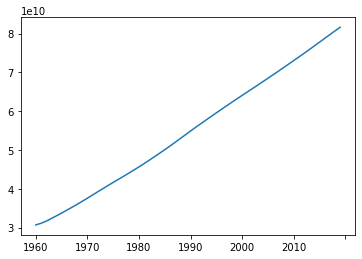

In [32]:
#we have to get rid of the year 2020
popul_sum = popul_sum.drop(['2020'])
#check it
popul_sum.plot()

## <strong>Now we are going to concatenate the two datasets together</strong>

In [33]:
df1 = rifr_modi_mean.to_frame()
df2 = popul_sum.to_frame()
df3 = popul_sum.index.to_frame()
df_m = pd.concat([df3, df2, df1], axis=1)
df_m.columns = ['Year', 'Popul', 'RIFR']
df_m.head(20)

,Year,Popul,RIFR
1960,1960,3.067910e+10,NaN
1961,1961,3.109155e+10,NaN
1962,1962,3.164271e+10,39691.071342
1963,1963,3.232857e+10,NaN
1964,1964,3.301982e+10,NaN
1965,1965,3.372814e+10,NaN
1966,1966,3.447389e+10,NaN
1967,1967,3.521684e+10,35360.823620
1968,1968,3.597359e+10,NaN
1969,1969,3.676787e+10,NaN


Now, we have our dataset. Unfortunately there are data for rifr only for every fourth year. I´m going to fill the gaps using interpolation.

In [34]:
#since the data for freshwater are available only until 2017, we have to get rid of the following years
df_m.drop(['2018', '2019'], inplace=True)
#now we can interpolate
df_m.interpolate(inplace=True)
# there are still 2 rows 0 and 1 with NaN. => drop them
df_m.drop(['1960', '1961'], inplace=True)

In [35]:
df_m.tail()
df_m.head()

,Year,Popul,RIFR
1962,1962,3.164271e+10,39691.071342
1963,1963,3.232857e+10,38825.021798
1964,1964,3.301982e+10,37958.972254
1965,1965,3.372814e+10,37092.922709
1966,1966,3.447389e+10,36226.873165


Now, our dataset Renewable internal freshwater resources per capita = > rifr per capita with one column containing population values for each year is clean and ready for building a model. I decided to use polinomial regression model. Because the decrease of RIFR depends on population growth, I will build two models. The first one will be for population growth depended on year and the second one will be for RIFR fall depended on population growth.

In [36]:
#import libraries
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression 
from sklearn.preprocessing import PolynomialFeatures 

In [37]:
#Prepare data
X = df_m.iloc[:, :1].values
y = df_m.iloc[:, 1:2].values

In [38]:
#setup the data
poly = PolynomialFeatures(degree = 2) 
X = poly.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
model = LinearRegression() 

In [39]:
#Fit the model + predict test set
model.fit(X_train, y_train)
expected_y  = y_test
predicted_y = model.predict(X_test)

In [40]:
# cehck the score , how accurate our model is.
print(model.score(X_train,y_train))
print(model.score(X_test,y_test))

0.9997129756155864
0.9998284895700452


not bad at all. Now let´s build the second model

In [41]:
#Prepare data
X2 = df_m.iloc[:, 1:2].values
y2 = df_m.iloc[:, 2:3].values
#setup the data
poly2 = PolynomialFeatures(degree = 2 ) 
X2 = poly2.fit_transform(X2)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2)
model2 = LinearRegression() 
#Fit the model + predict test set
model2.fit(X2_train, y2_train)
expected2_y  = y2_test
predicted2_y = model2.predict(X2_test)
# cehck the score , how accurate our model is.
print(model2.score(X2_train,y2_train))
print(model2.score(X2_test,y2_test))

0.9988875591530065
0.9975404215475999


The two models are ready now to make a prediction for Renewable internal freshwater resources per capita for next years according to population growth

In [42]:
#get population values fo the future
import numpy as np
years_f = np.array(['2018', '2019', '2020', '2021', '2022', '2023', '2025', '2030', '2035', '2040', '2050', '2060', '2080', '2100'])
df_yf = pd.DataFrame(years_f)
X_years_f = poly.fit_transform(df_yf)
popul_future = model.predict(X_years_f)

In [43]:
print(popul_future)
type(popul_future)

[[8.09376517e+10]
 [8.19221308e+10]
 [8.29099726e+10]
 [8.39011771e+10]
 [8.48957443e+10]
 [8.58936742e+10]
 [8.78996220e+10]
 [9.29733387e+10]
 [9.81311227e+10]
 [1.03372974e+11]
 [1.14108879e+11]
 [1.25181053e+11]
 [1.48334208e+11]
 [1.72832441e+11]]


numpy.ndarray

The prediction shows how the population will be developing in the future. Now we can take the prediction and put it in the second model

In [44]:
#the second model
df_pf = pd.DataFrame(popul_future)
X_pf = poly2.fit_transform(df_pf)
rifr_f = model2.predict(X_pf)
rifr_f

array([[14298.58405894],
       [14233.34109361],
       [14184.69770274],
       [14152.82597385],
       [14137.89858031],
       [14140.08878127],
       [14196.51793228],
       [14649.38962054],
       [15565.40951121],
       [16967.04047292],
       [21318.81770825],
       [27891.74677303],
       [48478.4521676 ],
       [80340.52019136]])

add the prediction to available data of Renewable internal freshwater resources per capita

In [45]:
rifr_fr = pd.Series(rifr_f.ravel(),index=['2018', '2019', '2020', '2021', '2022', '2023', '2025', '2030', '2035', '2040', '2050', '2060', '2080', '2100'])

In [46]:
rifr_cpl = pd.concat([rifr_modi_mean, rifr_fr])


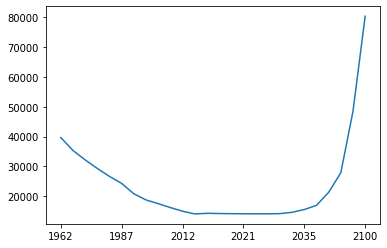

In [47]:
rifr_cpl.plot()

As you can see there is an error in my thinking, because the curve is rising in the tail. The reason there should be a linear model for the indicator freshwater resources per capita. lets change the model with degree = 1 => linear

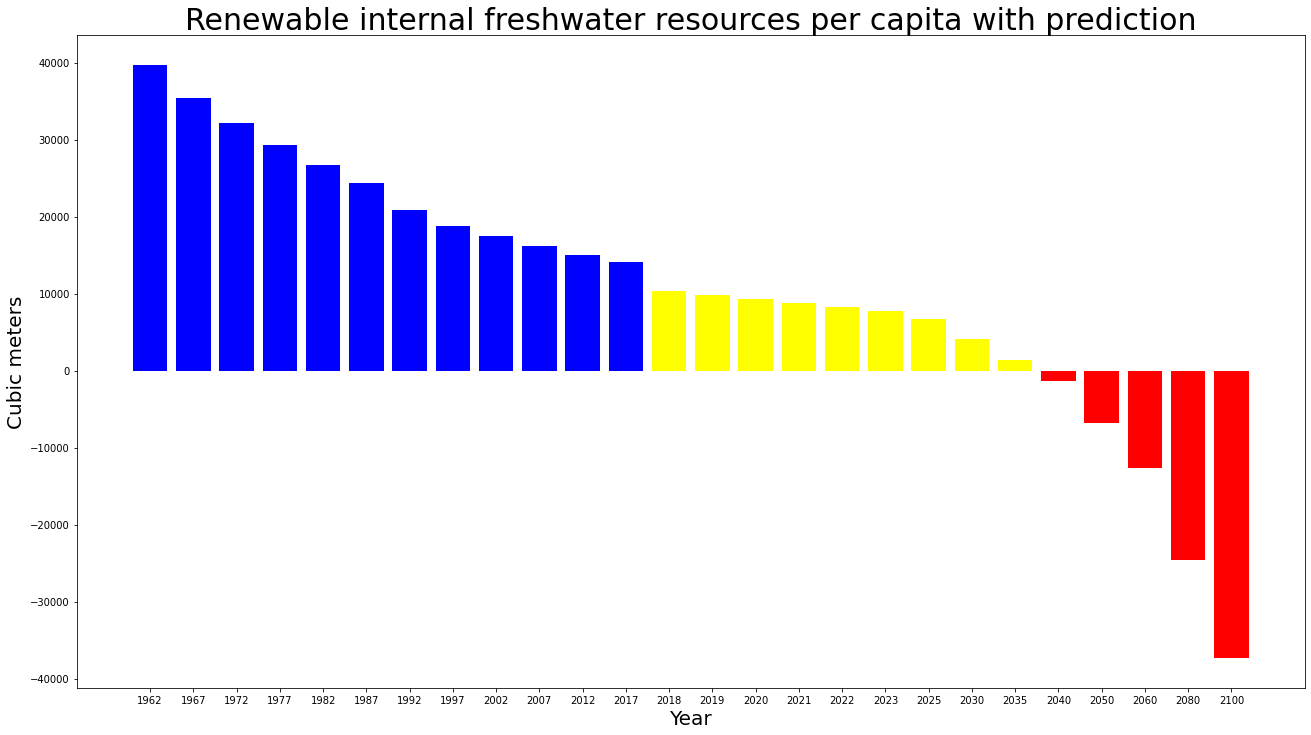

In [65]:
#Prepare data
X2 = df_m.iloc[:, 1:2].values
y2 = df_m.iloc[:, 2:3].values
#setup the data
poly2 = PolynomialFeatures(degree = 1 ) 
X2 = poly2.fit_transform(X2)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2)
model2 = LinearRegression() 
#Fit the model + predict test set
model2.fit(X2_train, y2_train)
expected2_y  = y2_test
predicted2_y = model2.predict(X2_test)
# cehck the score , how accurate our model is.
#print(model2.score(X2_train,y2_train))
#print(model2.score(X2_test,y2_test))
#the second model
df_pf = pd.DataFrame(popul_future)
X_pf = poly2.fit_transform(df_pf)
rifr_f = model2.predict(X_pf)
rifr_f
rifr_fr = pd.Series(rifr_f.ravel(),index=['2018', '2019', '2020', '2021', '2022', '2023', '2025', '2030', '2035', '2040', '2050', '2060', '2080', '2100'])
rifr_cpl = pd.concat([rifr_modi_mean, rifr_fr])


plt.figure(figsize=(22,12))
plt.xlabel('Year', fontsize=20)
plt.ylabel('Cubic meters', fontsize=20)
plt.title('Renewable internal freshwater resources per capita with prediction', fontsize=30)

cc=['colors']*len(rifr_cpl.values)
for n,val in enumerate(rifr_cpl.values):
    if val < 0:
        cc[n]='red'
    elif val > 14101:
       cc[n]='blue'      
    elif val >= 0:
        cc[n]='yellow'

plt.bar(rifr_cpl.index, rifr_cpl.values, color = cc)
plt.show()

Modeling values start with yellow color. Red zone are negative values 